# Predict fuel efficiency

#### Importing the needed libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
sns.set()

#### Get data

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Clean data

In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Dealing with categorical features

In [10]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [11]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [12]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


#### Plotting the correlation between features to decide which to use

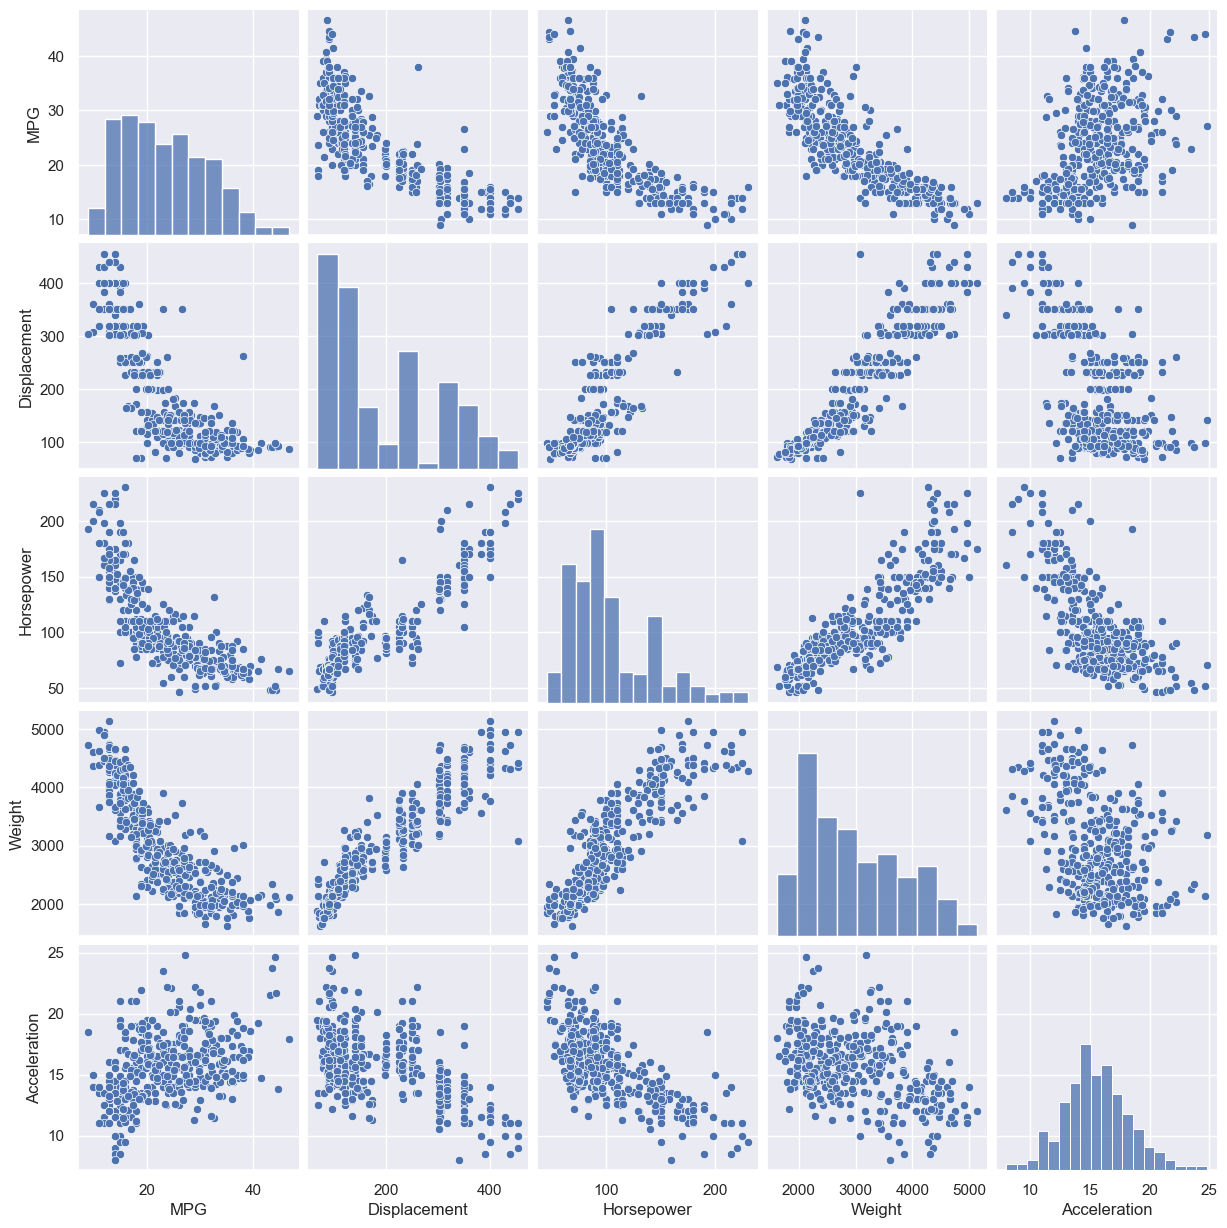

In [13]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

We conclude that the correlation between 'MPG' and the other features is strong except 'Acceleration' feature, also the 'Weight' feature is the strongest correlated with 'MPG'
Then we will try to make single linear regression using 'Weight' feature, and then to make multiple linear regression with all features except 'Acceleration'(I will try with and without)

In [14]:
#Splitting Data into Training and Testing Sets
datasetXsingle=dataset[['Weight']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetXMultiAcc=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [15]:
# use single-variable input to fit linear regression model
new_single_model = LinearRegression().fit(datasetXsingle, datasetY)

In [16]:
# use multi-variable input to fit linear regression model
datasetXMulti=sklearn.preprocessing.normalize(datasetXMulti)
datasetXMultiAcc=sklearn.preprocessing.normalize(datasetXMultiAcc)
new_multi_model = LinearRegression().fit(datasetXMulti, datasetY)
new_multi_model_ACC = LinearRegression().fit(datasetXMultiAcc, datasetY)


In [17]:
print(new_single_model.score(datasetXsingle, datasetY))
print(new_multi_model.score(datasetXMulti, datasetY))
print(new_multi_model_ACC.score(datasetXMultiAcc, datasetY))

0.6926304331206254
0.8640275841736155
0.8639104468793127
